# Introduction to Machine Learning and BDTs

Author: [Savannah Thais](https://github.com/savvy379)

## Introduction
This notebook introduces common python libraries that are useful for ML ([Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/)) and two 'simple' ML models: linear regression (applied to car fuel efficiency prediction) and boosted decision trees (applied to LHC event classification). Although the rest of the CODAS-HEP ML notebooks will use Pytorch Geoemtric, PyG isn't really designed for these types of models, so here we will use [Keras](https://keras.io/).

## Part 1: Python Libraries

### Numpy
A python library for handling arrays (matrices). Exercises adopted from this [lecture](https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html).

In [1]:
#start by importing
import numpy as np

Let's initialize an array (vector) of 10 elements.  
These elements are deterimined by random numbers drawn from a normal distribution

In [2]:
n=10
x=np.random.normal(size=n)
print(x)

[-0.12311875  0.16538093  0.51545134  0.22336449 -0.81831725 -0.34240447
  0.25000097 -0.09326508  0.15597788  0.66882325]


You can also initialize an array with specific values

In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Note that Python starts numbering elements from 0!

In [4]:
#get the first element of x
print(x[0])

1


In [5]:
#get the last element of x
print(x[-1])

3


You can also apply functions like log to an entire array

In [6]:
x=np.log(np.array([4, 7, 8]))
print(x)

[1.38629436 1.94591015 2.07944154]


*Note:* It's typically better to use the built in numpy functions because they're highly vectorized!

**Exercise:**
Write a NumPy program to convert the values of Centigrade degrees into Fahrenheit degrees. Centigrade values are stored into a NumPy array.
Sample Array [0, 12, 45.21 ,34, 99.91].

Hint: C/5=(F-32)/9

In [7]:
### your solution here
fvalues = [0, 12, 45.21, 34, 99.91]
F = np.array(fvalues)

We can also make matrices in numpy (and tensors of higher dimension)

In [8]:
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
print(A)

[[1.38629436 1.94591015 2.07944154]
 [1.09861229 2.30258509 2.39789527]
 [1.38629436 1.60943791 1.94591015]]


You can get information about the matrix and easily slice it (i.e. select specific values)

In [10]:
# get the matrix size
print("A size:", A.shape)
# make a new matrix B=log(A)
B = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print("first column of B:", B[:,0]) 

A size: (3, 3)
first column of B: [1.38629436 1.09861229 1.38629436]


 There are also functions to create matrices with certain values (0 or 1) or random values

In [11]:
# define a matrix of dimension 10 x 10 and set all elements to zero
A = np.zeros( (n, n) )
print("A:",A)
# define a matrix of dimension 10 x 10 and set all elements to one
B = np.ones( (n, n) )
print("B",B)
# define a matrix of dimension 10 x 10 and set all elements to random numbers with x \in [0, 1]
C = np.random.rand(n, n)
print("C",C) 

A: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
B [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
C [[0.27746678 0.70221273 0.17907066 0.47137121 0.55312154 0.49300628
  0.07651875 0.97634799 0.83107524 0.9232568 ]
 [0.51320432 0.93635766 0.92095029 0.05984882 0.86059048 0.33489079
  0.48676361 0.74607562 0.46690851 0.55960344]
 [0.1797159  0.09894301 0.55663579 0.99686872 0.688683   0.82064111
  0.17937358 0.61024732 0.4644042

**Exercise:**
Define two 2x2 matrices, one randomly initialized and one defined, and multiply them. Is the answer what you expect?

Hint: check the documentation for multiply and dot

In [12]:
### your solultion here

There is MUCH more functionality in numpy, but it can be easiest to learn by looking at the documentation as you try exercises. Additional Numpy exercises can be found [here](https://www.w3resource.com/python-exercises/numpy/index.php)!

### Pandas
A python library for data structures and analysis tools. Exercises adopted from this [lecture](https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html). For full documentation see [Pandas website](https://pandas.pydata.org/).

In [13]:
## start with importing
import pandas as pd

Pandas let's us make Dataframes (tensors) and Series (vectors). Let's initialize a matrix of LoTR characters:

In [14]:
data = {'First Name': ["Frodo", "Bilbo", "Aragorn II", "Samwise"],
        'Last Name': ["Baggins", "Baggins","Elessar","Gamgee"],
        'Place of birth': ["Shire", "Shire", "Eriador", "Shire"],
        'Date of Birth T.A.': [2968, 2890, 2931, 2980]
        }
data_pandas = pd.DataFrame(data)
data_pandas

,First Name,Last Name,Place of birth,Date of Birth T.A.
0,Frodo,Baggins,Shire,2968
1,Bilbo,Baggins,Shire,2890
2,Aragorn II,Elessar,Eriador,2931
3,Samwise,Gamgee,Shire,2980


You can easily change the Dataframe to be indexed by a different value, let's change it to character first name

In [15]:
data_pandas_name = pd.DataFrame(data,index=['Frodo','Bilbo','Aragorn','Sam'])
data_pandas_name

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980


And you can find info about a specific index value (row). Let's get info about Aragorn.

In [19]:
## by index (name)
data_pandas_name.loc['Aragorn']

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

In [20]:
## by row number
data_pandas_name.iloc[2]

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

You can also create data frames of purely numerical data (here our index could be samples and the columns could be different variables)

In [22]:
np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
a = np.random.randn(rows,cols)
df = pd.DataFrame(a)
df.columns = ['var_a', 'var_b', 'var_c', 'var_d', 'var_e']
df.index = np.arange(10)
df

,var_a,var_b,var_c,var_d,var_e
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


And get basic info about the dataframe

In [23]:
df.describe()

,var_a,var_b,var_c,var_d,var_e
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.175300,0.083527,-0.044334,-0.399836,0.331939
std,1.069584,0.965548,1.018232,0.793167,0.918992
min,-1.749765,-1.443217,-1.690617,-1.613579,-1.232435
25%,-0.522836,-0.633949,-0.713163,-0.785061,0.087887
50%,-0.280179,0.281930,-0.122282,-0.382187,0.463861
75%,0.441264,0.657041,0.861676,-0.205231,0.923602
max,1.618982,1.541605,1.361556,0.816847,1.470714


In [24]:
print("mean:", df.mean())
print("standard deviation:", df.std())

mean: var_a   -0.175300
var_b    0.083527
var_c   -0.044334
var_d   -0.399836
var_e    0.331939
dtype: float64
standard deviation: var_a    1.069584
var_b    0.965548
var_c    1.018232
var_d    0.793167
var_e    0.918992
dtype: float64


**Exercise:** Select the second column of our dataframe and display the mean. Select the last column of our dataframe and describe it.

In [25]:
#your solution here

Pandas is an extremely powerful library for reading (as we'll see in our linear regression model) and manipulating all kinds of data.   
Additional Pandas exercises can be found [here](https://www.w3resource.com/pandas/index.php)!

### Matplotlib
[Matplotlib](https://matplotlib.org/) is a library for easily creating and customizing plots in Python. There are other similar/useful libraries like [seaborn](https://seaborn.pydata.org/) and [plotly](https://plotly.com/).

In [26]:
## start by importing
import matplotlib 

You can easily create plots directly from numpy arrays

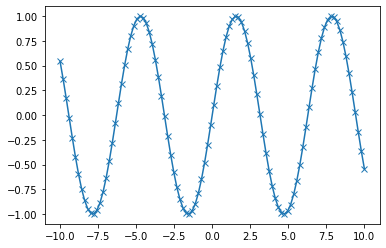

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
#generate data points of the sine function
x = np.linspace(-10,10,100)
y = np.sin(x)
## plot it 
plt.plot(x,y,marker='x')
plt.show()

You can also easily create plots from pandas dataframes. In fact, there is a pandas wrapper for matplotlib that let's you call plotting directly from the dataframe

In [28]:
#create a randomized data frame
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.363188,0.204345,0.276765,0.246536
1,0.173608,0.966610,0.957013,0.597974
2,0.731301,0.340385,0.092056,0.463498
3,0.508699,0.088460,0.528035,0.992158
4,0.395036,0.335596,0.805451,0.754349
5,0.313066,0.634037,0.540405,0.296794
6,0.110788,0.312640,0.456979,0.658940
7,0.254258,0.641101,0.200124,0.657625
8,0.778289,0.779598,0.610328,0.309000
9,0.697735,0.859618,0.625324,0.982408


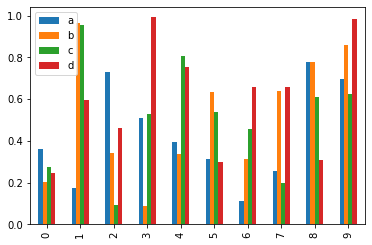

In [29]:
#plot it as a bar graph
df2.plot(kind='bar')

**Exercise:** create a green histogram of the third column of our dataframe df2

In [30]:
# your solution here

Matplot offers MANY different kinds of plots. Additional exercises can be found [here](https://www.w3resource.com/graphics/matplotlib/)

## Part 2: Keras and Linear Regression
[Keras](https://keras.io/) is an intuitive machine learning API built on top of the TensorFlow library. In this exercise we will build a linear regression model using the [Auto MPG] Dataset. This exercise is adopted from the [Keras Tutorial](https://www.tensorflow.org/tutorials/keras/regression).

In [31]:
#import keras and seaborn (for plotting)
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
print(tf.__version__)

2.8.2


The Auto MPG Dataset is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/) and has the data to build a model to predict fuel efficiency of late 1970s and early 1980s automobiles. It includes information like cylinders, displacement, horsepower, and weight. 

Let's read it in as a pandas dataframe

In [32]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [33]:
#make a copy for manipulation
dataset = raw_dataset.copy()
# print the last values of the dataframe
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


It's always important to clean the data before building a model. Let's check if there are any missing values in our dataframe

In [34]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

There are 6 NaN values in the horsepower column. Because we have ~400 values, we can just drop these rows to keep this exercise simple (note, this is often not best practice for dealing with missing data). 

In [35]:
#drop rows with nan values
dataset = dataset.dropna()

The origin column actually describes the country of origin of the automobile with the following mapping: 1=USA, 2=Europe, 3=Japan. Let's turn this into a one-hot encoded column so we can use it in our model. 

In [36]:
#define the mapping and replace the origin values
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
#use get_dummies (another great pandas function) to create one-hot columns
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
#get the first rows of df
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


**Question:** before building our model what else should we do to our dataset?

In [37]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Let's take a quick look at the joint distrubtion of some column pairs from the dataset

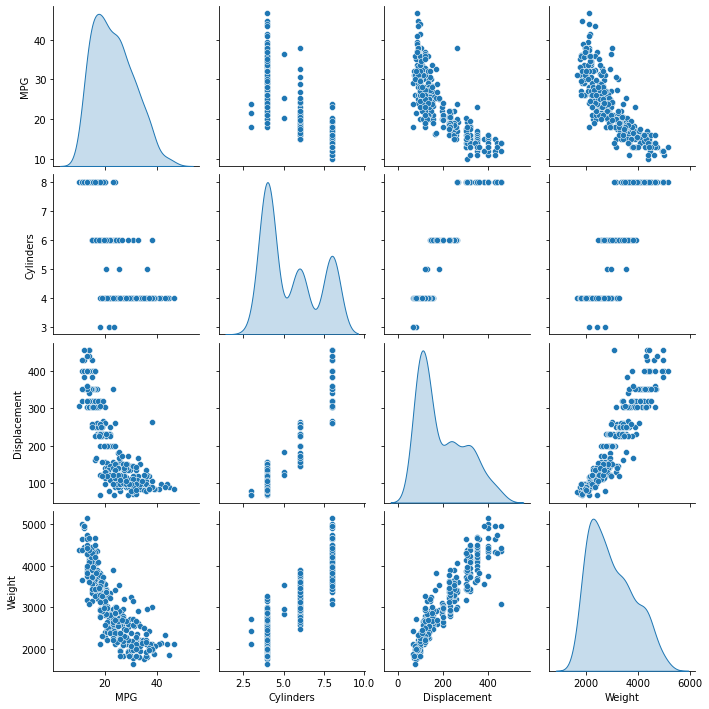

In [38]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

We can also use `describe` to get more info about the columns

In [40]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


**Question:** what kinds of patterns do you see here that you expect will be relevant to the model?

Because we're building a supervised model to predict the MPG of each car, we need to create a separate vector of the training and test labels



In [41]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

It's often important to normalize the variables before building a model so that one variable doesn't wash out the information from others. 

In [42]:
# get the mean and std of each column
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


Keras has a built in functionality to build normalization preprocessing into your model

In [43]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
#create the normalization layer
normalizer = preprocessing.Normalization()
# get the specific values for our data
normalizer.adapt(np.array(train_features))
# we can look at these values and compare them to what we saw above
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


Let's start with a simple single-variable regression to predict MPG from only Horsepower. First, we have to define the model architecture. We'll set up our linear regression model as a single layer neural network with no activation function (more on this soon) which is equivalent to matrix multiplication plus a bias term. 

In [57]:
## get just the horsepower
horsepower = np.array(train_features['Horsepower'])

## define normalizer 
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [58]:
# build the sequential layer (using a standard dense layer (matrix multiplication) of order 1)
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


We can check that the model gives us the expected dimensionality (though the values will be terrible since we haven't trained yet)

In [59]:
# run model on first 10 rows
horsepower_model.predict(horsepower[:10])

array([[-0.07124052],
       [-0.0402347 ],
       [ 0.13148987],
       [-0.09986129],
       [-0.09032103],
       [-0.03546457],
       [-0.10701647],
       [-0.09032103],
       [-0.02353925],
       [-0.0402347 ]], dtype=float32)

Now we train the model using the `Model.compile()` method. We must specify the loss (we'll use mean absolute error) and the optimizer (we'll use Adam, a type of gradient descent algorithm that we'll learn more about in the NN lectue).

In [60]:
#configure training 
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [61]:
%%time
#run the training! 
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.44 s, sys: 149 ms, total: 3.59 s
Wall time: 5.43 s


We can look at the model's training process using the stats stored in the `history` object

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,4.469564,4.112854,95
96,4.244111,4.346601,96
97,4.669395,4.244362,97
98,4.020863,4.827736,98
99,4.128093,4.623786,99


In [50]:
#plot the training history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

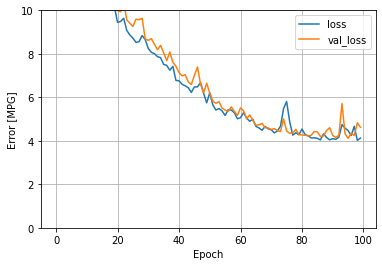

In [51]:
plot_loss(history)

In [64]:
# check performance on test set

score = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)
print(score)

3.6571202278137207


Since we're only using one variable it's easy to visualize the results of our model

In [67]:
## create set of data points to plot our model function
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [66]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

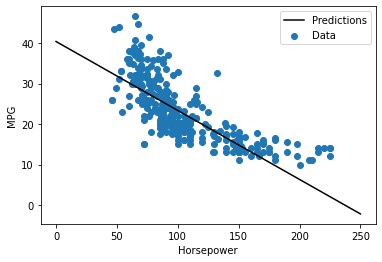

In [68]:
plot_horsepower(x, y)